In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.linear_model import RidgeCV,LassoCV,LinearRegression,ElasticNet
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import r2_score
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=14,16
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler

In [0]:
train = pd.read_excel('Data_Train.xlsx')
test = pd.read_excel('Data_Test.xlsx')

In [5]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [0]:
combined = train.append(test)

In [7]:
combined["Location"].nunique()

35

In [8]:
train["Restaurant"].nunique()

7480

In [0]:
combined.reset_index(inplace=True,drop=True)

In [0]:
combined = combined.assign(No_of_Cuisines=np.nan)
for i in range(len(combined)):
  combined["No_of_Cuisines"][i] = len(str(combined.iloc[i,1]).split(','))

In [0]:
combined = combined.assign(Extracted_loc='')
for i in range(len(combined)):
  ls = str(combined.iloc[i,3]).split(',')
  j = len(ls)
  combined["Extracted_loc"][i] = ls[j-1]

In [0]:
combined['Delivery_Time'] = combined['Delivery_Time'].str.split(' ').str[0]

In [0]:
combined['Minimum_Order'] = combined['Minimum_Order'].replace({'₹':''},regex=True).map(pd.eval).astype(int)

In [0]:
combined['Average_Cost'] = combined['Average_Cost'].replace({"₹":"",",":"",'for':'200'},regex=True)

In [0]:
combined['Average_Cost'] = combined['Average_Cost'].astype(float)

In [194]:
combined['Average_Cost'].value_counts()

200.0     4062
100.0     3221
150.0     3051
250.0     1104
300.0      710
350.0      354
400.0      346
50.0       337
600.0      184
500.0      116
550.0       73
450.0       72
650.0       63
800.0       50
750.0       41
700.0       19
1000.0      16
850.0       16
900.0       15
1200.0      10
950.0        4
1150.0       1
1100.0       1
2050.0       1
1400.0       1
Name: Average_Cost, dtype: int64

In [0]:
le = LabelEncoder()
combined['Location'] = le.fit_transform(combined['Location'])

In [0]:
combined['Restaurant'] = le.fit_transform(combined['Restaurant'])

In [0]:
combined['Extracted_loc'] = le.fit_transform(combined['Extracted_loc'])

In [197]:
combined.dtypes

Average_Cost      float64
Cuisines           object
Delivery_Time      object
Location            int64
Minimum_Order       int64
Rating             object
Restaurant          int64
Reviews            object
Votes              object
No_of_Cuisines    float64
Extracted_loc      object
dtype: object

In [198]:
combined['Rating'].value_counts()

-                     1496
3.7                   1081
3.6                   1069
3.5                   1015
3.8                    983
3.9                    965
NEW                    958
3.4                    903
3.3                    828
4.0                    755
3.2                    640
4.1                    574
3.1                    531
3.0                    367
4.2                    342
4.3                    299
2.9                    256
2.8                    198
4.4                    171
2.7                     98
4.5                     96
2.6                     51
4.6                     48
4.7                     42
2.5                     33
2.4                     18
4.8                     16
Opening Soon            14
2.3                      8
4.9                      8
2.1                      2
Temporarily Closed       2
2.2                      1
Name: Rating, dtype: int64

In [0]:
combined['Rating'] = combined['Rating'].replace({"-":"2.5","Opening Soon":"0",'Temporarily Closed':'2.0',"NEW":"2.0"},regex=True)
combined['Reviews'] = combined['Reviews'].replace({"-":"0"},regex=True)
combined['Votes'] = combined['Votes'].replace({"-":"0"},regex=True)

In [0]:
combined['Cuisine1'] = combined['Cuisines'].str.split(',').str[0]
combined['Cuisine2'] = combined['Cuisines'].str.split(',').str[1]
combined['Cuisine3'] = combined['Cuisines'].str.split(',').str[2]
combined['Cuisine4'] = combined['Cuisines'].str.split(',').str[3]
combined['Cuisine5'] = combined['Cuisines'].str.split(',').str[4]
combined['Cuisine6'] = combined['Cuisines'].str.split(',').str[5]
combined['Cuisine7'] = combined['Cuisines'].str.split(',').str[6]
combined['Cuisine8'] = combined['Cuisines'].str.split(',').str[7]

In [0]:
combined['Cuisine1'].fillna("None",inplace=True)
combined['Cuisine2'].fillna("None",inplace=True)
combined['Cuisine3'].fillna("None",inplace=True)
combined['Cuisine4'].fillna("None",inplace=True)
combined['Cuisine5'].fillna("None",inplace=True)
combined['Cuisine6'].fillna("None",inplace=True)
combined['Cuisine7'].fillna("None",inplace=True)
combined['Cuisine8'].fillna("None",inplace=True)

In [0]:
cuisines = ['Cuisine1','Cuisine2','Cuisine3','Cuisine4','Cuisine5','Cuisine6','Cuisine7','Cuisine8']
combined[cuisines] = combined[cuisines].apply(le.fit_transform)

In [0]:
cols = ['Delivery_Time','Rating','Reviews','Votes']
combined[cols] = combined[cols].astype(float)

In [206]:
combined

,Average_Cost,Cuisines,Delivery_Time,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes,No_of_Cuisines,Extracted_loc,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8
0,200.0,"Fast Food, Rolls, Burger, Salad, Wraps",30.0,10,50,3.5,5915,4.0,12.0,5.0,12,26,67,16,55,59,46,28,17
1,100.0,"Ice Cream, Desserts",30.0,30,50,3.5,2093,4.0,11.0,2.0,8,36,25,80,68,60,46,28,17
2,150.0,"Italian, Street Food, Fast Food",65.0,19,50,3.6,663,30.0,99.0,3.0,20,39,74,25,68,60,46,28,17
3,250.0,"Mughlai, North Indian, Chinese",30.0,28,99,3.7,5478,95.0,176.0,3.0,11,60,60,20,68,60,46,28,17
4,200.0,"Cafe, Beverages",65.0,26,99,3.2,5695,235.0,521.0,2.0,14,19,11,80,68,60,46,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13863,100.0,"Fast Food, Chinese",NaN,8,50,2.0,5938,0.0,0.0,2.0,17,26,22,80,68,60,46,28,17
13864,250.0,"Continental, North Indian, Desserts, Beverages",NaN,17,50,3.1,8329,1.0,5.0,4.0,15,23,60,23,9,60,46,28,17
13865,150.0,"Andhra, South Indian",NaN,22,50,3.0,6805,1.0,16.0,2.0,4,3,71,80,68,60,46,28,17
13866,100.0,Bakery,NaN,4,99,3.0,1641,2.0,7.0,1.0,11,9,82,80,68,60,46,28,17


In [0]:
train_data = combined[0:11094]
test_data = combined[11094:]
test_data.drop(['Delivery_Time'],axis=1,inplace=True)

In [208]:
test_data

,Average_Cost,Cuisines,Location,Minimum_Order,Rating,Restaurant,Reviews,Votes,No_of_Cuisines,Extracted_loc,Cuisine1,Cuisine2,Cuisine3,Cuisine4,Cuisine5,Cuisine6,Cuisine7,Cuisine8
11094,350.0,"North Indian, Chinese, Assamese",17,50,4.2,2049,225.0,361.0,3.0,15,63,22,5,68,60,46,28,17
11095,100.0,"Biryani, Kebab",17,50,2.0,7002,0.0,0.0,2.0,15,14,40,80,68,60,46,28,17
11096,100.0,Fast Food,28,50,3.6,4025,16.0,36.0,1.0,11,26,82,80,68,60,46,28,17
11097,200.0,"Mithai, North Indian, Chinese, Fast Food, Sout...",1,50,3.6,4969,33.0,66.0,5.0,1,57,60,20,20,51,46,28,17
11098,150.0,"Chinese, Fast Food",28,50,2.9,2501,14.0,38.0,2.0,11,21,27,80,68,60,46,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13863,100.0,"Fast Food, Chinese",8,50,2.0,5938,0.0,0.0,2.0,17,26,22,80,68,60,46,28,17
13864,250.0,"Continental, North Indian, Desserts, Beverages",17,50,3.1,8329,1.0,5.0,4.0,15,23,60,23,9,60,46,28,17
13865,150.0,"Andhra, South Indian",22,50,3.0,6805,1.0,16.0,2.0,4,3,71,80,68,60,46,28,17
13866,100.0,Bakery,4,99,3.0,1641,2.0,7.0,1.0,11,9,82,80,68,60,46,28,17


In [113]:
combined['No_of_Cuisines'].value_counts()

2.0    4907
1.0    3785
3.0    3066
4.0    1316
5.0     498
6.0     156
7.0      85
8.0      55
Name: No_of_Cuisines, dtype: int64

In [0]:
num_cols = ['Average_Cost','Delivery_Time','Minimum_Order','Rating','Reviews','Votes','No_of_Cuisines','Cuisine1','Cuisine2','Cuisine3','Cuisine4','Cuisine5','Cuisine6','Cuisine7','Cuisine8']
train_data = train_data[num_cols]

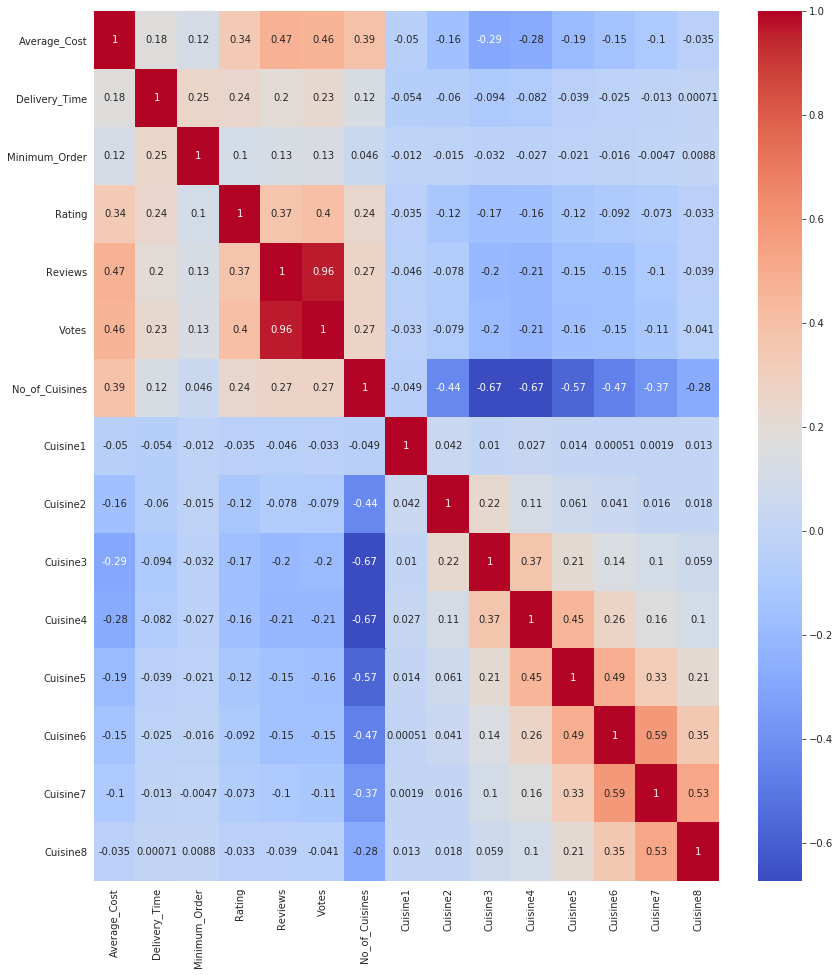

In [226]:
sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm',fmt='.2g')

In [0]:
train_time = train_data["Delivery_Time"]
train_data.drop(['Delivery_Time'],axis=1,inplace=True)

In [0]:
inner_cv = KFold(n_splits=5,shuffle=True,random_state=42)
outer_cv = KFold(n_splits=10,shuffle=True,random_state=42)

In [0]:
def rmse(model):
  rmse = np.sqrt(-cross_val_score(model,train_data,train_time,scoring="neg_mean_squared_error",cv=outer_cv))
  return(rmse)

In [229]:
gbr = GradientBoostingRegressor()
Adbr = AdaBoostRegressor()
br = BaggingRegressor()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()
model_names = ["Gradient Boosting Regressor","AdaBoost Regressor","Bagging Regressor","Decision Tree Regressor","Random Forest Regressor","XGB Regressor"]
models = [gbr,Adbr,br,dtr,rfr,xgbr]
for name,model in zip(model_names,models):
  print("RMSE score for ",name," is : ",rmse(model).mean())
  model.fit(train_data,train_time)
  pred_views = model.predict(train_data)
  print("R^2 Score for",name,"is : ",r2_score(train_time,pred_views),"\n\n")

RMSE score for  Gradient Boosting Regressor  is :  10.456859149996697
R^2 Score for Gradient Boosting Regressor is :  0.338616334995673 


RMSE score for  AdaBoost Regressor  is :  12.516498125220647
R^2 Score for AdaBoost Regressor is :  0.022863268324090358 


RMSE score for  Bagging Regressor  is :  9.6183354027818
R^2 Score for Bagging Regressor is :  0.8785494695611371 


RMSE score for  Decision Tree Regressor  is :  12.175464509951452
R^2 Score for Decision Tree Regressor is :  0.9767928917067255 


RMSE score for  Random Forest Regressor  is :  9.208842384407983
R^2 Score for Random Forest Regressor is :  0.9085948198402398 


[18:08:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:08:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:08:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in fav

In [31]:
pred_gbr = gbr.predict(train_data)
pred_gbr[:15]

array([31.89879638, 32.63343959, 40.59852515, 48.80360903, 52.3008794 ,
       34.94973036, 38.84265041, 43.61851253, 38.55713901, 45.43097364,
       40.31052168, 45.62345157, 30.9492238 , 40.20813065, 32.5580178 ])

In [129]:
pred_dtr = dtr.predict(train_data)
pred_dtr[:15]

array([30., 30., 65., 30., 65., 30., 30., 45., 30., 65., 30., 45., 30.,
       45., 30.])

In [137]:
test_data.shape

(2774, 17)

In [0]:
num_col = ['Average_Cost','Minimum_Order','Rating','Reviews','Votes','No_of_Cuisines','Cuisine1','Cuisine2','Cuisine3','Cuisine4','Cuisine5','Cuisine6','Cuisine7','Cuisine8']
test_data = test_data[num_col]

In [0]:
pred_test = dtr.predict(test_data)

In [232]:
pred_test.shape

(2774,)

In [0]:
pred_test = pred_test.astype(int).astype(str)

In [0]:
pred_test = np.core.defchararray.add(pred_test," minutes")

In [0]:
dtr2 = DecisionTreeRegressor()
parameters = {
    'max_features': ['sqrt', 'auto', 'log2'],
    'min_samples_split': [6,8,10],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5]
}

dtr_grid = GridSearchCV(dtr2,
                          parameters,
                          scoring='neg_mean_squared_error', #this line can be commented to use XGB's default metric
                          cv = inner_cv,
                          n_jobs = 4,
                          verbose=True)

In [0]:
dtr_pipeline = make_pipeline(StandardScaler(),dtr_grid).fit(train_data,train_time)

In [0]:
print("RMSE score for Decision Tree Regressor is : ",rmse(dtr_pipeline).mean())

In [154]:
dtr_grid.best_params_

{'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 6}

In [0]:
final_dtr = DecisionTreeRegressor(max_depth = 110,
 max_features = 'auto',
 min_samples_leaf = 5,
 min_samples_split = 8)

In [156]:
final_dtr_pipeline = make_pipeline(StandardScaler(),final_dtr).fit(train_data,train_time)
print(r2_score(train_time,final_dtr_pipeline.predict(train_data)))

0.6465232211100798


In [0]:
My_submission = pd.DataFrame({"Delivery_Time":pred_test})
My_submission.to_excel('my_submission.xlsx',index=False)